In [71]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
df = pd.read_csv("troop_movements.csv")

In [73]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-11 10:02:55,1,resistance_soldier,resistance,9,7,8,3,Sullust
1,2024-07-11 10:02:54,2,at-at,empire,3,7,1,8,Tatooine
2,2024-07-11 10:02:53,3,tie_silencer,empire,1,2,3,3,Cerea
3,2024-07-11 10:02:52,4,at-at,empire,4,9,7,3,Tund
4,2024-07-11 10:02:51,5,stormtrooper,empire,9,9,6,5,Kashyyyk


In [74]:
for columnname in df.columns:
    print(df[columnname].value_counts())

timestamp
2024-07-11 10:02:55    1
2024-07-11 09:51:44    1
2024-07-11 09:51:57    1
2024-07-11 09:51:56    1
2024-07-11 09:51:55    1
                      ..
2024-07-11 09:57:17    1
2024-07-11 09:57:16    1
2024-07-11 09:57:15    1
2024-07-11 09:57:14    1
2024-07-11 09:46:16    1
Name: count, Length: 1000, dtype: int64
unit_id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
unit_type
resistance_soldier    136
tie_fighter           134
at-st                 130
at-at                 128
unknown               128
x-wing                120
stormtrooper          114
tie_silencer          110
Name: count, dtype: int64
empire_or_resistance
empire        644
resistance    356
Name: count, dtype: int64
location_x
6     121
7     113
4     108
5     105
9     103
2      97
1      96
3      93
10     88
8      76
Name: count, dtype: int64
location_y
7     126
9     113
8     108
2     103
5 

In [75]:
df["is_resistance"] = df["empire_or_resistance"] == "resistance"

In [76]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 10:02:55,1,resistance_soldier,resistance,9,7,8,3,Sullust,True
1,2024-07-11 10:02:54,2,at-at,empire,3,7,1,8,Tatooine,False
2,2024-07-11 10:02:53,3,tie_silencer,empire,1,2,3,3,Cerea,False
3,2024-07-11 10:02:52,4,at-at,empire,4,9,7,3,Tund,False
4,2024-07-11 10:02:51,5,stormtrooper,empire,9,9,6,5,Kashyyyk,False


Text(0.5, 12.44444444444443, '')

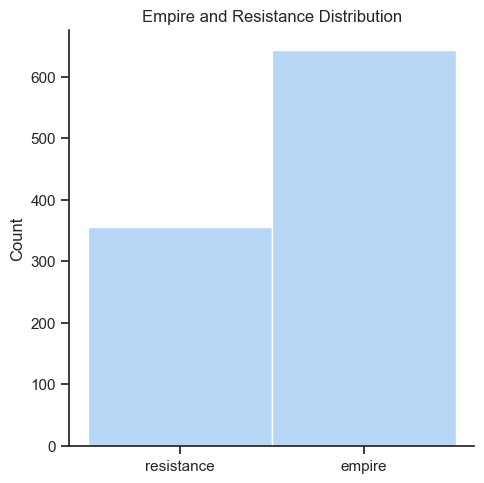

In [77]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="pastel", rc=custom_params)
sns.displot(x="empire_or_resistance", data=df )
plt.pyplot.title("Empire and Resistance Distribution")
plt.pyplot.xlabel("")

In [78]:
df.dtypes

timestamp               object
unit_id                  int64
unit_type               object
empire_or_resistance    object
location_x               int64
location_y               int64
destination_x            int64
destination_y            int64
homeworld               object
is_resistance             bool
dtype: object

In [79]:
df2 =pd.get_dummies(df,columns = ["homeworld","unit_type"])

In [80]:
df2.columns

Index(['timestamp', 'unit_id', 'empire_or_resistance', 'location_x',
       'location_y', 'destination_x', 'destination_y', 'is_resistance',
       'homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
    

In [81]:
feature_cols = ['homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
       'homeworld_Trandosha', 'homeworld_Troiken', 'homeworld_Tund',
       'homeworld_Umbara', 'homeworld_Vulpter', 'homeworld_Zolan',
       'unit_type_at-at', 'unit_type_at-st', 'unit_type_resistance_soldier',
       'unit_type_stormtrooper', 'unit_type_tie_fighter',
       'unit_type_tie_silencer', 'unit_type_unknown', 'unit_type_x-wing']
X = df2[feature_cols]
y = df2.is_resistance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [82]:
X_train.dtypes

homeworld_Alderaan              bool
homeworld_Aleen Minor           bool
homeworld_Bestine IV            bool
homeworld_Cerea                 bool
homeworld_Champala              bool
homeworld_Chandrila             bool
homeworld_Concord Dawn          bool
homeworld_Corellia              bool
homeworld_Dagobah               bool
homeworld_Dathomir              bool
homeworld_Dorin                 bool
homeworld_Eriadu                bool
homeworld_Glee Anselm           bool
homeworld_Haruun Kal            bool
homeworld_Iktotch               bool
homeworld_Iridonia              bool
homeworld_Kalee                 bool
homeworld_Kashyyyk              bool
homeworld_Malastare             bool
homeworld_Mirial                bool
homeworld_Mon Cala              bool
homeworld_Muunilinst            bool
homeworld_Naboo                 bool
homeworld_Ojom                  bool
homeworld_Quermia               bool
homeworld_Rodia                 bool
homeworld_Ryloth                bool
h

In [83]:
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

cross_val_score(clf, X_test, y_test, cv=10)

array([0.73333333, 0.86666667, 0.86666667, 0.73333333, 0.8       ,
       0.86666667, 0.93333333, 0.8       , 0.8       , 0.8       ])

importances = clf.feature_importances_

In [84]:
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

Text(0.5, 0, 'Features')

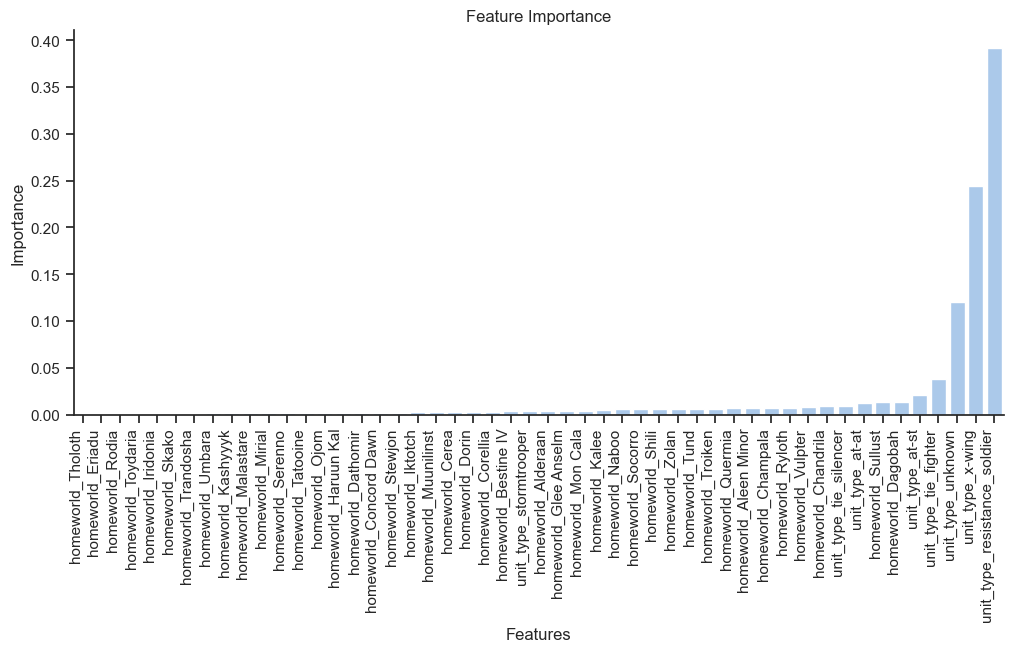

In [85]:
feature_importance.sort_values(by=['Importance'])
# fet_order = feature_importance['Feature'].value_counts().index
fig, ax = plt.pyplot.subplots(figsize=(12, 5))
sns.barplot(x="Feature", y="Importance", data=feature_importance, order=feature_importance.sort_values('Importance').Feature )
plt.pyplot.xticks(rotation=90, ha='right')
plt.pyplot.title("Feature Importance")
plt.pyplot.xlabel("Features")

In [86]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(clf, file)